In [1]:
## TODO
# 1. Plot number of steps for different R values
# 2. Find r value with most interesting behaviour

# 3. Run simmulation on CPU and GPU for different N's and save time
# 4. Plot size vs time 

# 5. Repeat 1-4 for 3D case

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # 3D visualization
from tqdm.auto import tqdm

# Wider cells
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Make sure folder for images exist
import os
try:
    os.mkdir('imgs')
except FileExistsError as err:
    pass

# Jupyter magic
%reload_ext autoreload
%autoreload 2
# %matplotlib inline

# 2D Schelling model

In [46]:
from schelling import game_2d

N = 100
C = 2
R = [3/8, 1/2, 5/8]

In [45]:
# R = 3/8
r = R[0]
_ = game_2d(N, C, r, game_length=30, create_gif=True, device="cuda")

# R = 4/8
r = R[1]
_ = game_2d(N, C, r, game_length=40, create_gif=True, device="cuda")

# R = 5/8
r = R[2]
_ = game_2d(N, C, r, game_length=50, create_gif=True, device="cuda")

In [20]:

%matplotlib inline
R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
# R = [3/8, 1/2, 5/8]

N = 50
C = 2
game_length = 50
global_moved = []
for r in R:
    moved = game_2d(N, C, r, game_length=50, create_gif=False, device="cuda")
    global_moved.append(moved)

In [15]:
# fig, ax = plt.subplots(figsize=(14,11))

# for i, r in enumerate(R):
#     ax.plot(global_moved[i], label=f'R={int(r*8)}|8')
#     ax.tick_params(axis='both', which='major', labelsize=20)
#     ax.set_xlabel('iteration', fontsize=20)
#     ax.set_ylabel('# of moves', fontsize=20)
#     ax.legend(fontsize=20)

In [48]:
N = [int(n) for n in np.linspace(10, 2e3, num=30)]
print(N)
r = 3/4
C = 2
game_length = 100

cpu_performance = []

[10, 78, 147, 215, 284, 353, 421, 490, 558, 627, 696, 764, 833, 902, 970, 1039, 1107, 1176, 1245, 1313, 1382, 1451, 1519, 1588, 1656, 1725, 1794, 1862, 1931, 2000]


In [49]:
for n in tqdm(N):
    time = %timeit -o -q game_2d(int(n), C, r, game_length=100, create_gif=False, device="cpu")
    cpu_performance.append(time)

In [50]:
cuda_performance = []

In [51]:
for n in tqdm(N):
    time = %timeit -o -q game_2d(int(n), C, r, game_length=100, create_gif=False, device="cuda")
    cuda_performance.append(time)

In [55]:
cpu_performance[0].stdev

<TimeitResult : 65.6 ms ± 2.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)>

Text(0.5, 1.0, '2D Schelling model')

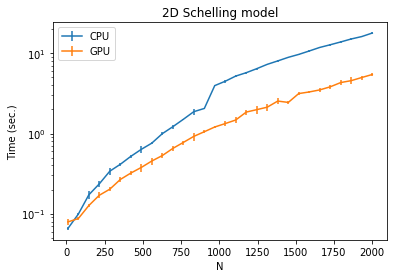

In [64]:
# plt.plot(N, [t.average for t in cpu_performance])
# plt.plot(N, [t.average for t in cuda_performance])

plt.errorbar(
    N,
    [t.average for t in cpu_performance],
    [t.stdev for t in cpu_performance],
)
plt.errorbar(
    N,
    [t.average for t in cuda_performance],
    [t.stdev for t in cuda_performance],
)

plt.xlabel("N")
plt.ylabel("Time (sec.)")
plt.yscale("log")
plt.legend(["CPU", "GPU"])
plt.title("2D Schelling model")

#### 2D model with C=3

In [ ]:
N = 100
C = 4
r = 3/4
game_length = 1000

moved = game_2d(N, C, r, game_length, create_gif=True, device="cuda")

# 3D Schelling model

In [1]:
from schelling_3d import game_3d

%matplotlib inline
# %matplotlib notebook

N = 30
C = 2 # Number of different neighbourhoods

# All possible r values for 3D case
R_3d = [i / 27 for i in range(27)]

r = R_3d[15]

### Check that everything works correctly
Plot 3D cube and projections on each plane for one class (here I chosen to project class 1), so color defines total number of 'ones' in that plane cell

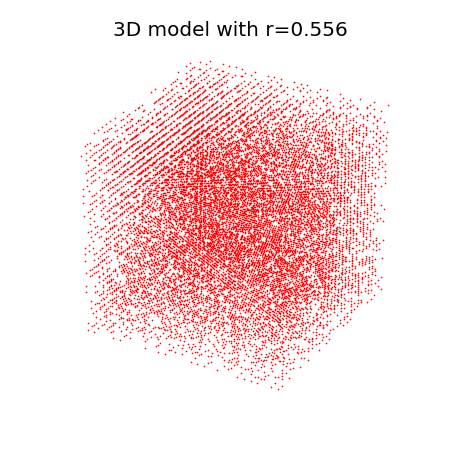

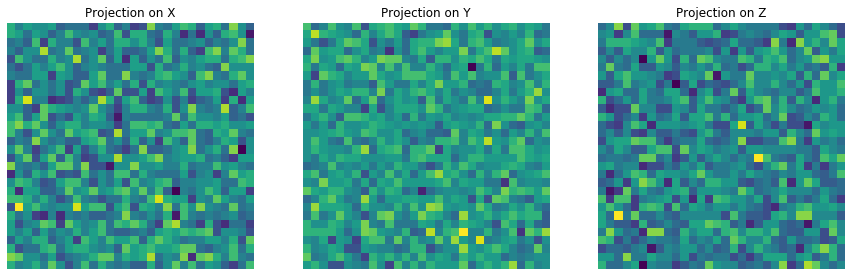

In [2]:
from tqdm.auto import tqdm
from schelling_3d import init_map_3d, prepare_3d_plot, plot_3d, plot_projections


game_map = init_map_3d(N, C)
x, y, z, c, proj_x, proj_y, proj_z = prepare_3d_plot(game_map, projections=True)

# Plot 3D cube to check 
plot_3d(x, y, z, c, r, figsize=(8, 8))

# If we increase N size of cube becomes to big to visialize it properly, 
# so projections are more reliable. Also notice, that in the beginnig cells are almost evenly distributed.
# Plot projections
plot_projections(proj_x, proj_y, proj_z)


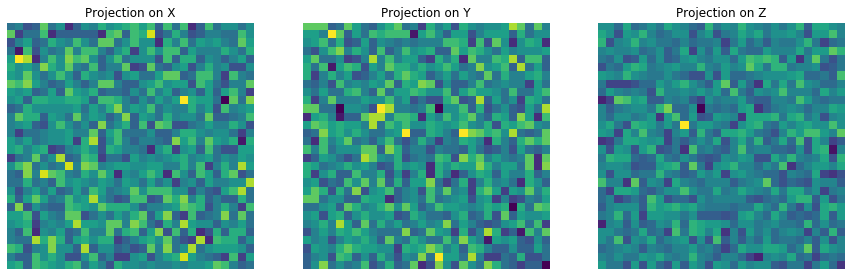

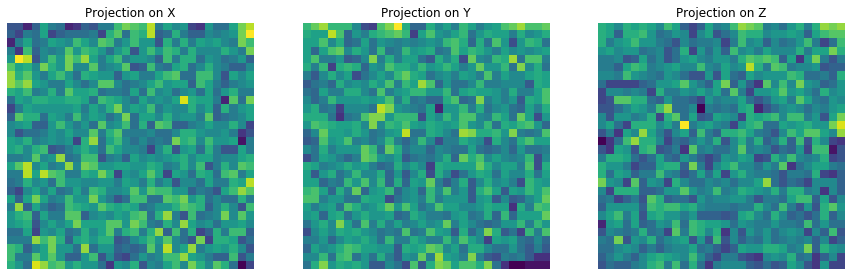

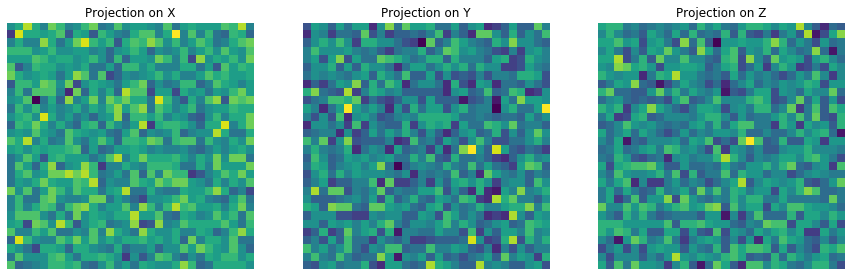

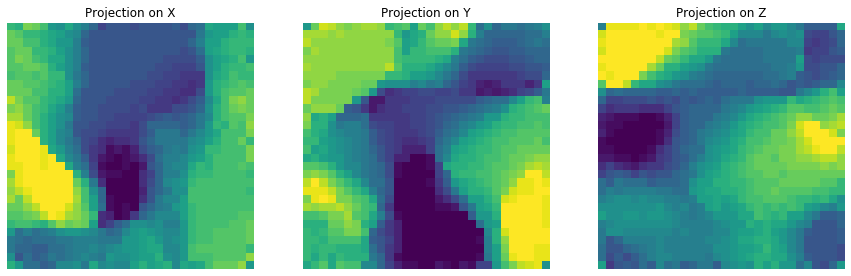

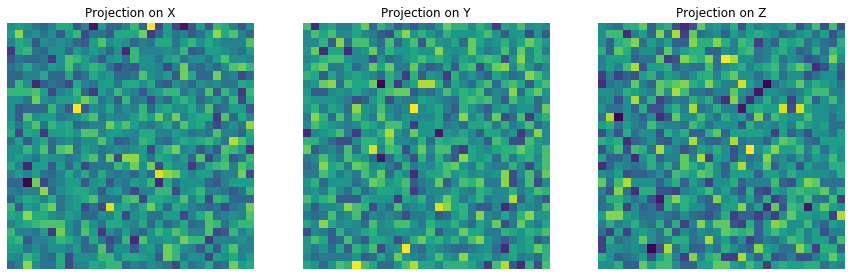

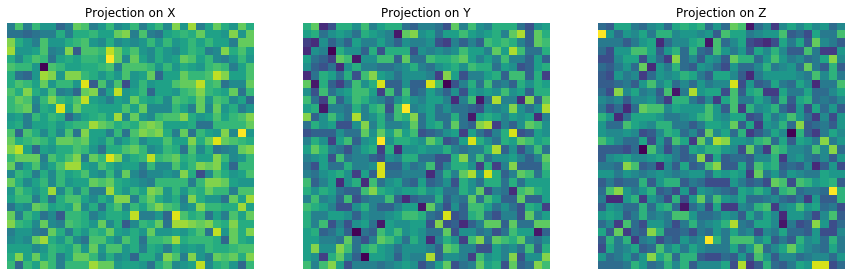

In [3]:

r = R_3d[7]
_, _ = game_3d(N, C, r, game_length=50, create_gif=True, proj=False, device="cuda")


r = R_3d[15]
_, _ = game_3d(N, C, r, game_length=50, create_gif=True, proj=False, device="cuda")


r = R_3d[23]
_, _ = game_3d(N, C, r, game_length=50, create_gif=True, proj=False, device="cuda")

In [7]:
N = [int(n) for n in np.linspace(10, 400, num=30)]
print(N)
r = 15/27
C = 2
game_length = 50

[10, 23, 36, 50, 63, 77, 90, 104, 117, 131, 144, 157, 171, 184, 198, 211, 225, 238, 252, 265, 278, 292, 305, 319, 332, 346, 359, 373, 386, 400]


In [ ]:
cpu_performance = []

for n in tqdm(N):
    time = %timeit -o -q  game_3d(n, C, r, game_length=50, create_gif=False, proj=False, device="cpu")
    cpu_performance.append(time)

Let's look at the number of moving cells

In [ ]:
cuda_performance = []

for n in tqdm(N):
    time = %timeit -o -q  game_3d(n, C, r, game_length=50, create_gif=False, proj=False, device="cuda")
    cuda_performance.append(time)

In [ ]:
# plt.plot(N, [t.average for t in cpu_performance])
# plt.plot(N, [t.average for t in cuda_performance])

plt.errorbar(
    N,
    [t.average for t in cpu_performance],
    [t.stdev for t in cpu_performance],
)
plt.errorbar(
    N,
    [t.average for t in cuda_performance],
    [t.stdev for t in cuda_performance],
)

plt.xlabel("N")
plt.ylabel("Time (sec.)")
plt.yscale("log")
plt.legend(["CPU", "GPU"])
plt.title("3D Schelling model")